## Introduction

#### Objective: Find  zipcodes that are likely to increase in value i.e. that are with investing in.


### Scenario: I am an analyst at a real estate investment firm trying to find zipcodes worth investing in by predicting their likely price change. 

### import libraries


In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import plotly as py
# import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
# import pmdarima as pm
# from pmdarima.arima import auto_arima
# from pyramid.arima.utils import ndiffs
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings('ignore')
# %matplotlib notebook
import seaborn as sns

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
# plt.style.use('ggplot')

from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from pmdarima import metrics
from sklearn.metrics import mean_squared_error

### Load Data

In [2]:
#import data
df=pd.read_csv('zillow_data.csv') 


In [3]:
#look at data
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [68]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


### Cleaning and EDA

In [4]:
df2=df #new dataframe
df2=df2.dropna() #drop zipcodes with missing data 
df2['recession_return']=(df2['2011-06']/df2['2007-06'])-1 #find zipcodes that did the best in the great recession
df2=df2.sort_values('recession_return',ascending=False)[:5] #select top 5 zipcodes
df2


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,recession_return
10579,89953,73128,Oklahoma City,OK,Oklahoma City,Oklahoma,10580,87900.0,88500.0,88900.0,...,167700,169100,169300,168700,168300,168200,168000,167600,167300,0.408126
10571,78486,47220,Brownstown,IN,Seymour,Jackson,10572,105200.0,104500.0,103700.0,...,125700,126100,126600,127500,127900,127900,128100,128700,129100,0.349367
14305,78518,47281,Vallonia,IN,Seymour,Jackson,14306,102300.0,101300.0,100300.0,...,122900,124000,124000,125300,126500,126200,127000,129700,130800,0.333333
4892,89895,73064,Mustang,OK,Oklahoma City,Canadian,4893,82100.0,82800.0,83200.0,...,163300,163800,164000,164400,164800,165600,166400,166600,166300,0.329982
21,61703,10128,New York,NY,New York,New York,22,3676700.0,3704200.0,3729600.0,...,7422400,7417600,7427300,7371400,7342700,7353300,7350300,7363000,7386600,0.326018


In [5]:
df2=df2.rename({'RegionName': 'Zipcode'}, axis='columns') #rename region to zipcode

df3=df2.set_index(df2['Zipcode']) #set zipcodes to index
df3=df3.drop(columns=['RegionID','Zipcode',	'City',	'State','Metro','CountyName','SizeRank','recession_return']) #drop non price data

df3

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
Zipcode,,,,,,,,,,,,,,,,,,,,,
73128,87900.0,88500.0,88900.0,89100.0,89100.0,89000.0,89000.0,88800.0,88900.0,89600.0,...,166600,167700,169100,169300,168700,168300,168200,168000,167600,167300
47220,105200.0,104500.0,103700.0,103100.0,102500.0,101900.0,101400.0,100800.0,100100.0,99500.0,...,125400,125700,126100,126600,127500,127900,127900,128100,128700,129100
47281,102300.0,101300.0,100300.0,99300.0,98500.0,97600.0,96700.0,95800.0,94900.0,94000.0,...,121400,122900,124000,124000,125300,126500,126200,127000,129700,130800
73064,82100.0,82800.0,83200.0,83300.0,83200.0,82900.0,82500.0,81900.0,81500.0,81300.0,...,163100,163300,163800,164000,164400,164800,165600,166400,166600,166300
10128,3676700.0,3704200.0,3729600.0,3754600.0,3781800.0,3813500.0,3849600.0,3888900.0,3928800.0,3964600.0,...,7410100,7422400,7417600,7427300,7371400,7342700,7353300,7350300,7363000,7386600


In [6]:
df4=df3.transpose() #transpose
df4

Zipcode,73128,47220,47281,73064,10128
1996-04,87900.0,105200.0,102300.0,82100.0,3676700.0
1996-05,88500.0,104500.0,101300.0,82800.0,3704200.0
1996-06,88900.0,103700.0,100300.0,83200.0,3729600.0
1996-07,89100.0,103100.0,99300.0,83300.0,3754600.0
1996-08,89100.0,102500.0,98500.0,83200.0,3781800.0
...,...,...,...,...,...
2017-12,168300.0,127900.0,126500.0,164800.0,7342700.0
2018-01,168200.0,127900.0,126200.0,165600.0,7353300.0
2018-02,168000.0,128100.0,127000.0,166400.0,7350300.0
2018-03,167600.0,128700.0,129700.0,166600.0,7363000.0


In [7]:
df4.set_index(pd.to_datetime(df4.index, format='%Y-%m'),inplace=True) #make index date


In [8]:
df4.isna().sum() #no missing values

Zipcode
73128    0
47220    0
47281    0
73064    0
10128    0
dtype: int64

In [9]:
#convert column names from int to string
df4.rename(columns={73128:'73128',47220:'47220',47281:'47281',73064:'73064',10128:'10128'},inplace=True)
df4.columns

Index(['73128', '47220', '47281', '73064', '10128'], dtype='object', name='Zipcode')

<AxesSubplot:>

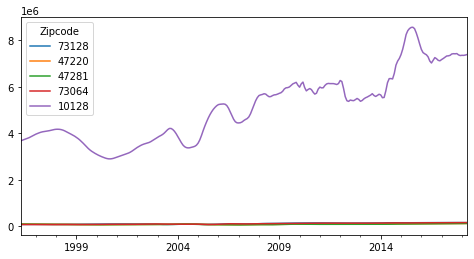

In [10]:
# plot price history
df4.plot(figsize=(8,4))

<AxesSubplot:>

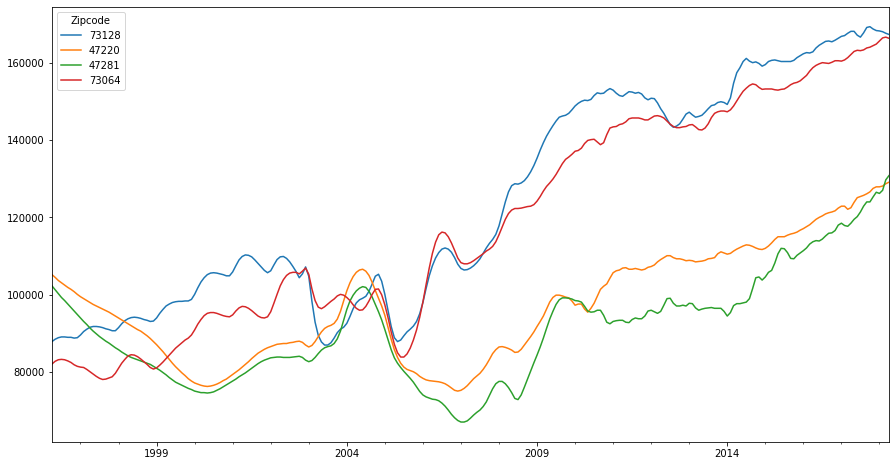

In [66]:
#plot price history exlcluding outlier (10128)
df4.iloc[:,0:4].plot(figsize=(15,8))

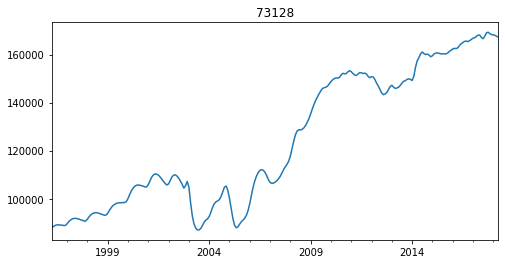

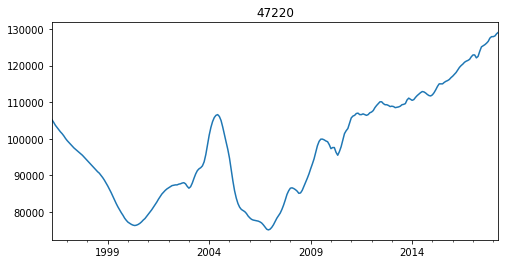

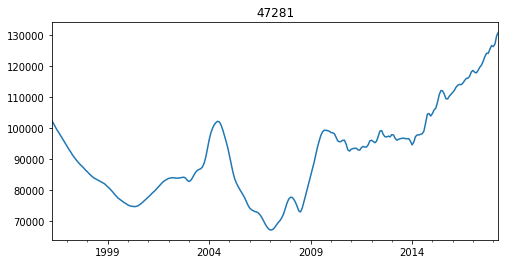

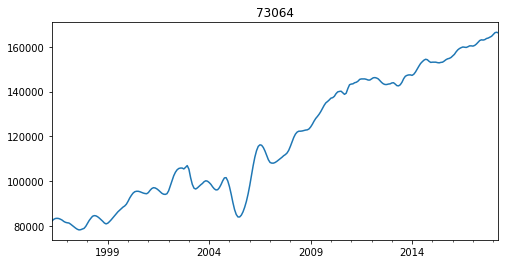

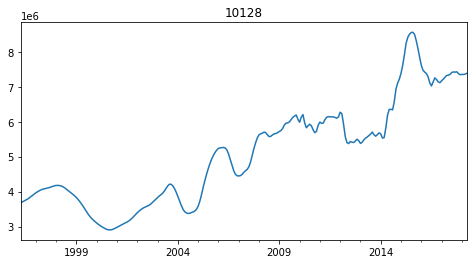

In [11]:
#plot each zipcode seperate
for i in df4.columns: 
    fig, ax = plt.subplots(figsize=(8,4))
    ax.set_title(str(i))
    df4[i].plot()

In [12]:
df4.corr() #look at correlation between zips

Zipcode,73128,47220,47281,73064,10128
Zipcode,,,,,
73128,1.000000,0.758325,0.698105,0.981098,0.880108
47220,0.758325,1.000000,0.961722,0.763331,0.736357
47281,0.698105,0.961722,1.000000,0.694567,0.688026
73064,0.981098,0.763331,0.694567,1.000000,0.889686
10128,0.880108,0.736357,0.688026,0.889686,1.000000


In [13]:
# check for stationarity 
def stat_check(df):
    
    
    # rolling stats
    roll_mean = df.rolling(window=8, center=False).mean()
    roll_std = df.rolling(window=8, center=False).std()
    
    # Dickey Fuller test
    dftest = adfuller(df) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(8,6))
    orig = plt.plot(df, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling_mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling_std')
    plt.legend(loc='best')
    plt.title(str(df.name)+' Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test
    print('Results of df Test: \n')

    df_out = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        df_out['Critical Value (%s)'%key] = value
    print(df_out)
    


73128


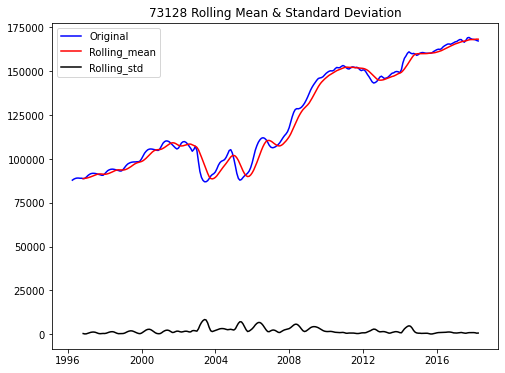

Results of df Test: 

Test Statistic                  -0.369704
p-value                          0.915036
#Lags Used                       9.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64
/n
47220


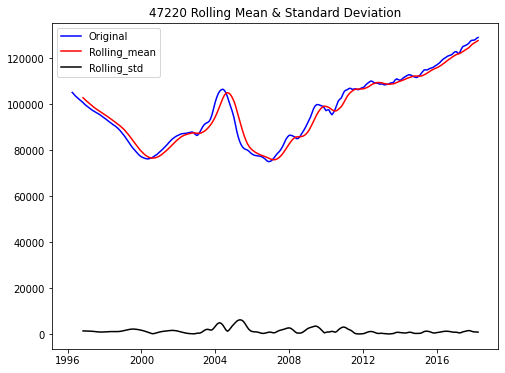

Results of df Test: 

Test Statistic                  -1.003374
p-value                          0.752032
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64
/n
47281


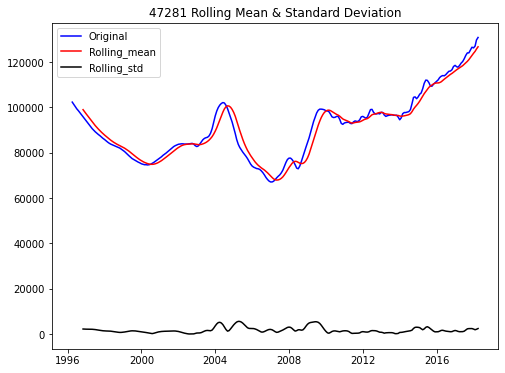

Results of df Test: 

Test Statistic                  -0.325290
p-value                          0.921845
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64
/n
73064


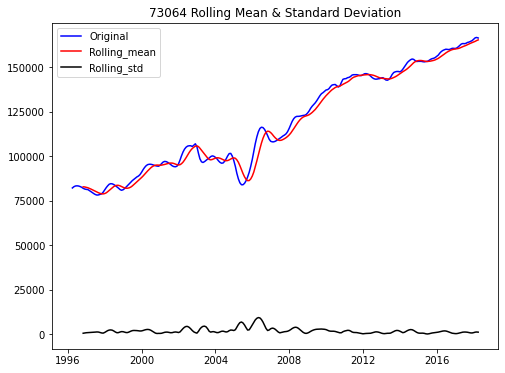

Results of df Test: 

Test Statistic                  -0.073167
p-value                          0.952046
#Lags Used                       7.000000
Number of Observations Used    257.000000
Critical Value (1%)             -3.456054
Critical Value (5%)             -2.872853
Critical Value (10%)            -2.572799
dtype: float64
/n
10128


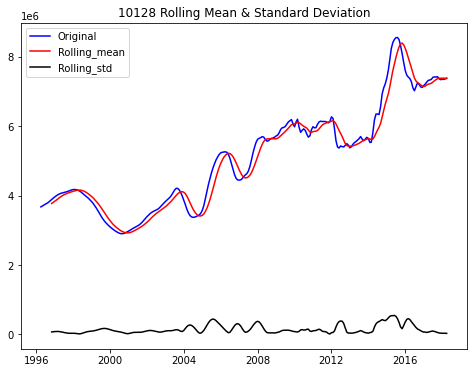

Results of df Test: 

Test Statistic                  -0.272859
p-value                          0.929261
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64
/n


In [14]:
# run stat check for all zips
for i in df4.columns:
    print(i)
    stat_check(df4[i])
    print('/n')

none of the zipcodes appear to be stationary

73128


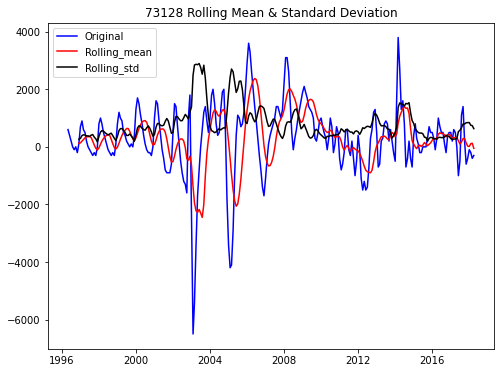

Results of df Test: 

Test Statistic                  -5.198157
p-value                          0.000009
#Lags Used                       8.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64
/n
47220


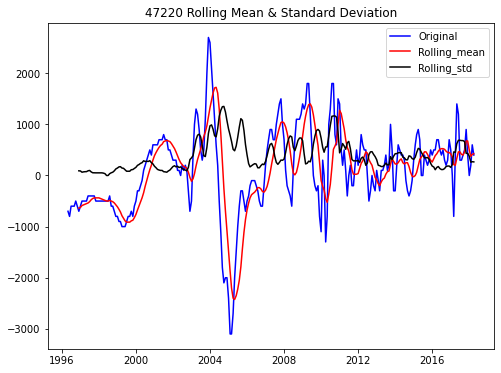

Results of df Test: 

Test Statistic                  -3.262080
p-value                          0.016661
#Lags Used                      12.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64
/n
47281


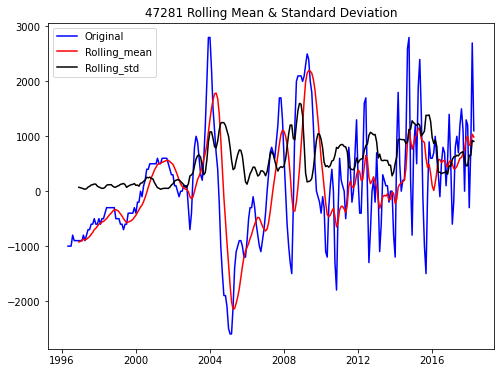

Results of df Test: 

Test Statistic                  -3.539732
p-value                          0.007023
#Lags Used                      12.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64
/n
73064


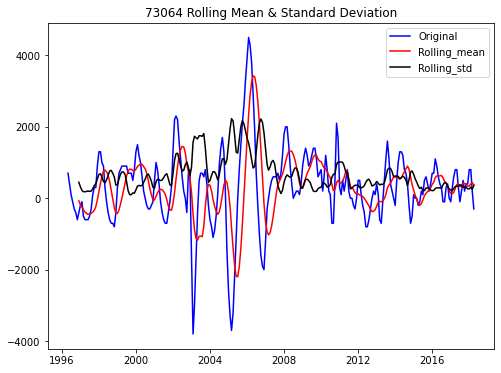

Results of df Test: 

Test Statistic                -6.860422e+00
p-value                        1.607806e-09
#Lags Used                     6.000000e+00
Number of Observations Used    2.570000e+02
Critical Value (1%)           -3.456054e+00
Critical Value (5%)           -2.872853e+00
Critical Value (10%)          -2.572799e+00
dtype: float64
/n
10128


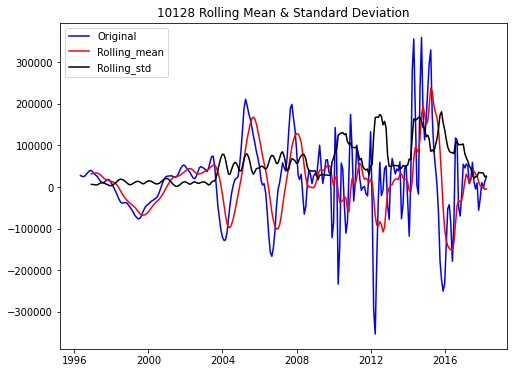

Results of df Test: 

Test Statistic                  -4.569093
p-value                          0.000147
#Lags Used                      14.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64
/n


In [15]:
#differenced once, run again
for i in df4.columns:
    print(i)
    stat_check(df4[i].diff().dropna())
    print('/n')

differencing by 1 gets all the p values under 0.05 i.e. stationary

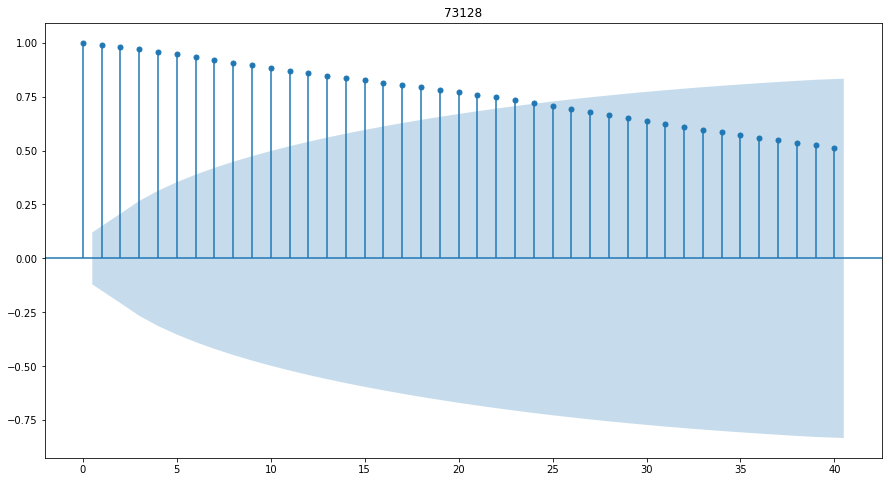

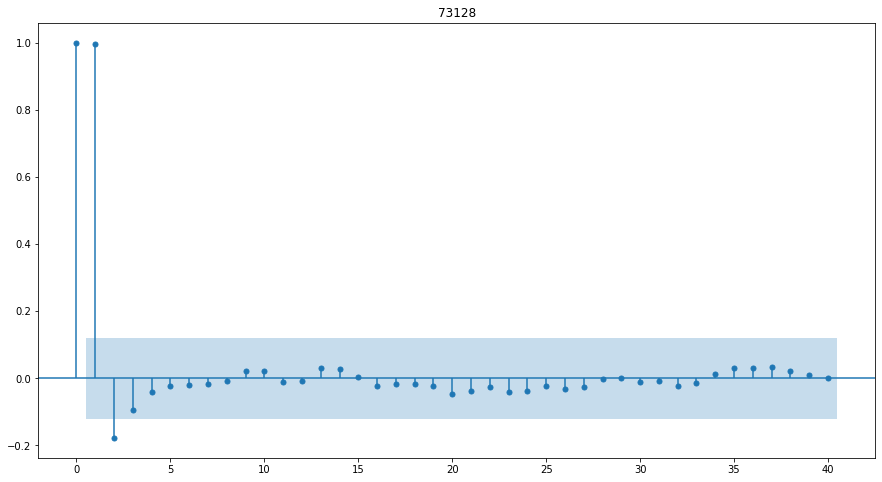

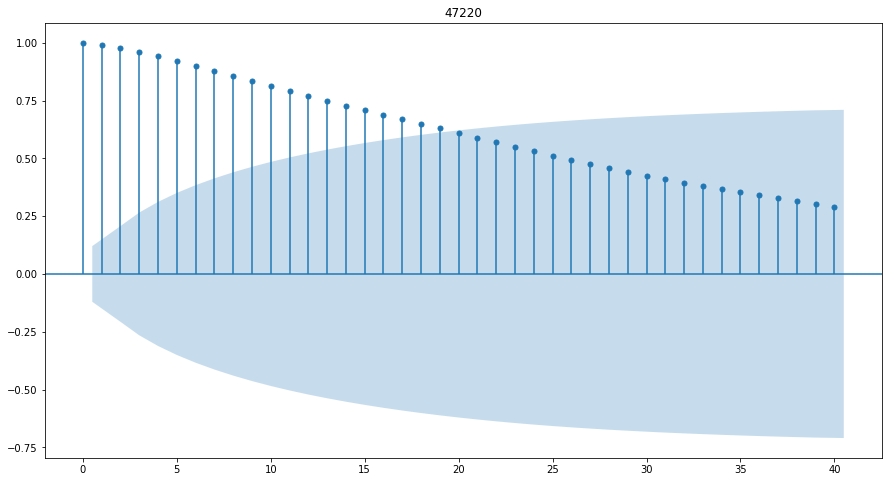

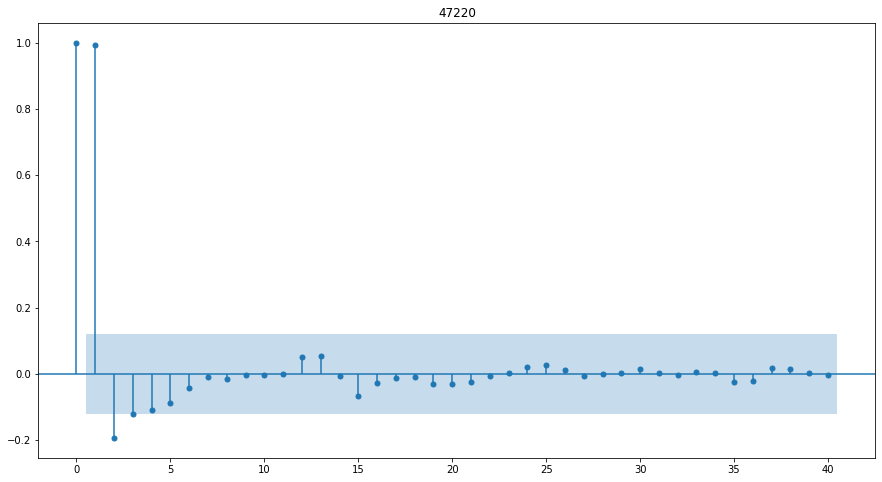

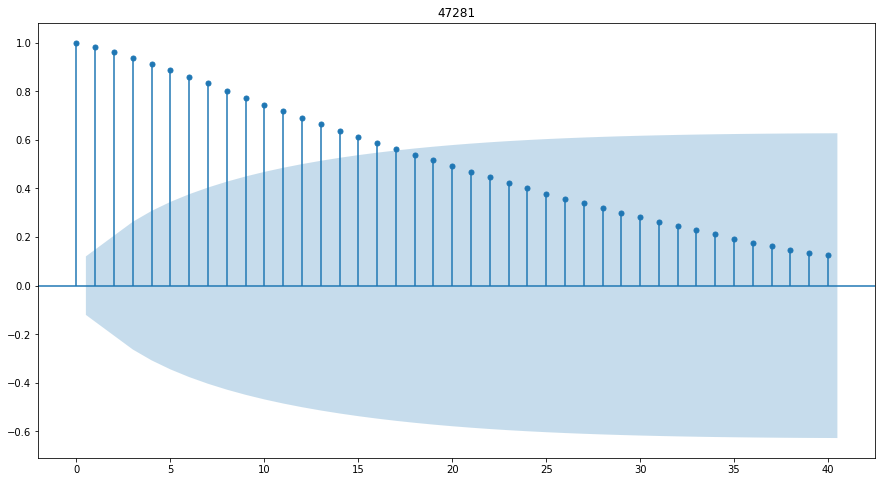

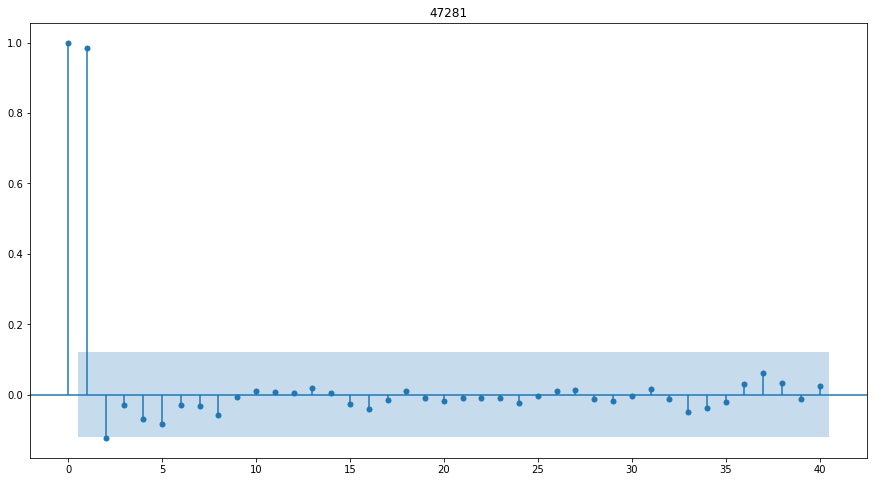

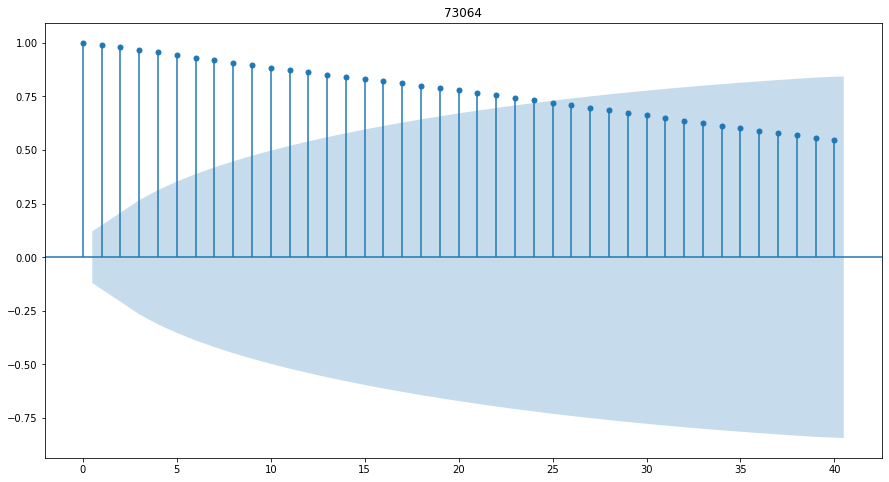

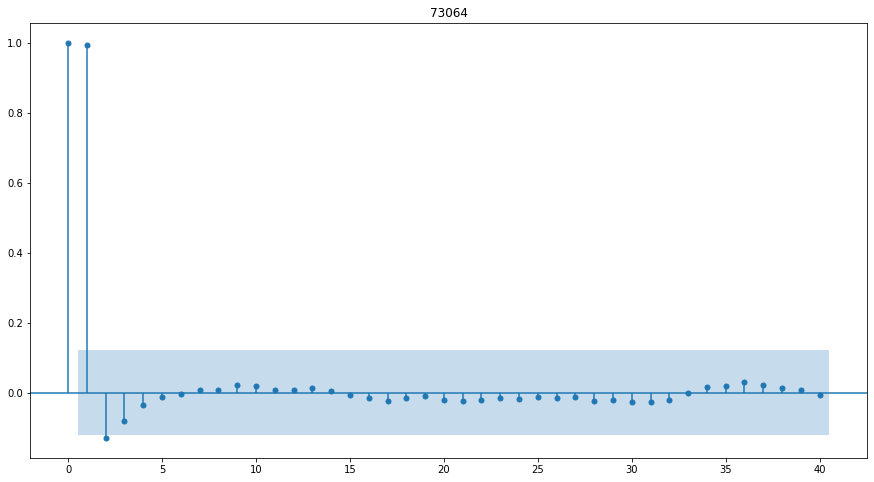

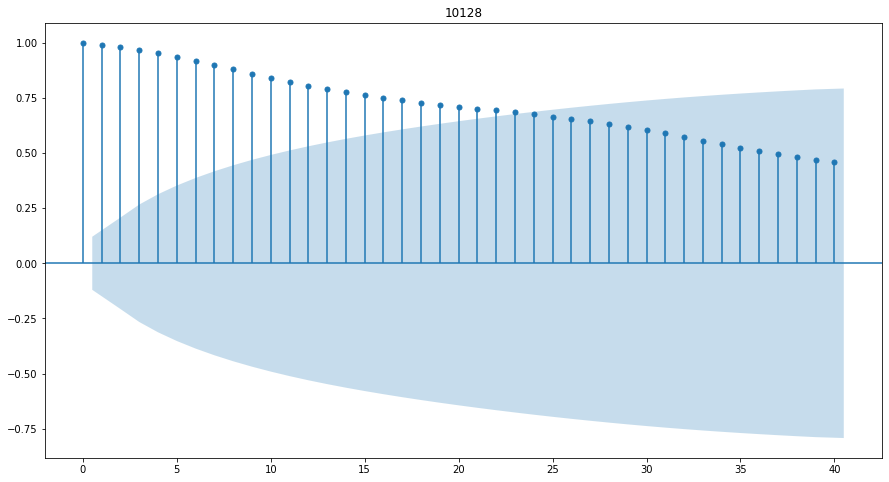

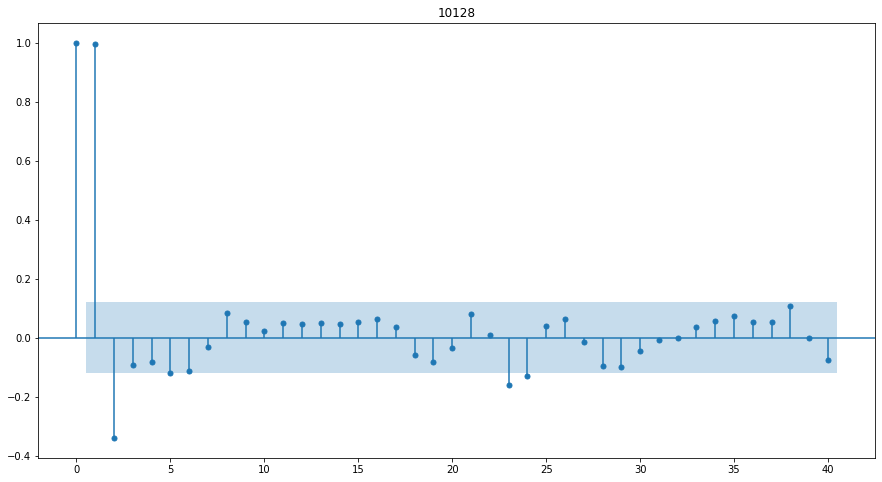

In [72]:
#check acf and pacf for each zip
for i in df4.columns:
#     ax.set_title(str(i))
    plot_acf(df4[i],lags=40,title=i)
    plot_pacf(df4[i],lags=40,title=i)

All the zipcodes look to have ACFs that are significant upto/around 25 and PACFs upto 2

In [17]:
# create model to see seasonal_decompose

def s_decomp(data):
    decomposition = seasonal_decompose(data)

    # get the different pieces
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot the different components
    plt.figure(figsize=(8,6))
    plt.subplot(411)
    plt.plot(data, label='Original '+str(data.name), color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend '+str(data.name), color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality '+str(data.name), color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals '+str(data.name), color='blue')
    plt.legend(loc='best')
    plt.tight_layout()



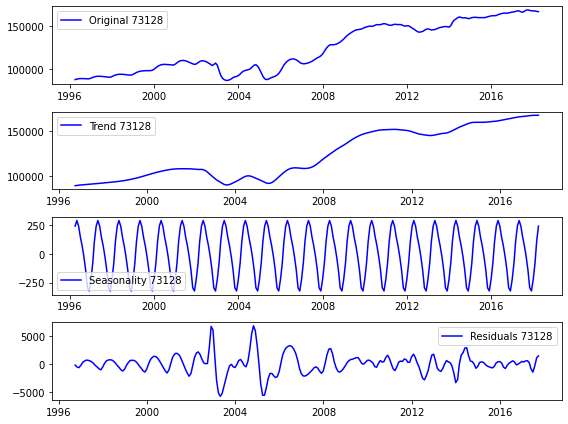

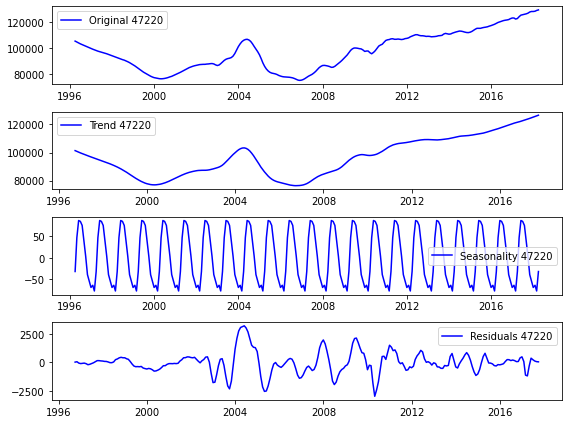

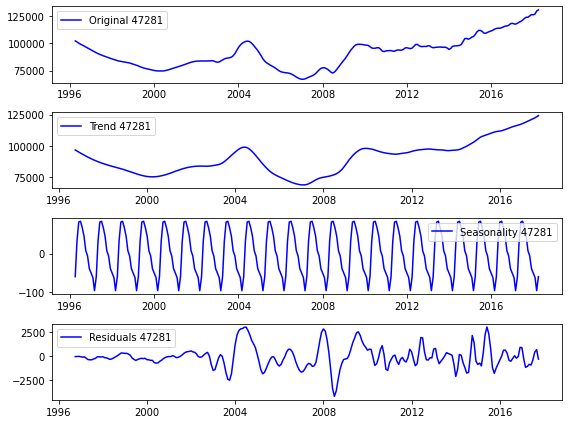

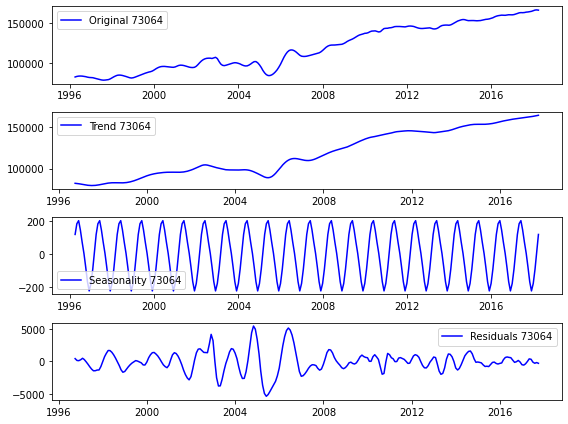

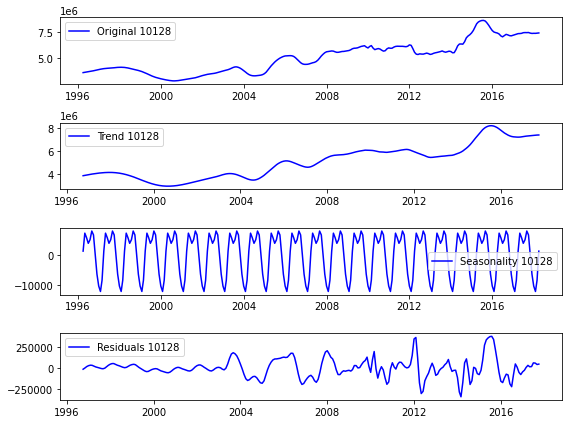

In [18]:
# look at seasonal_decompose for each zip
for i in df4.columns:
    s_decomp(df4[i])

There appears to be some potential seasonality in the zipcodes

### Initial Modeling

In [21]:
# create data frames for results of each zipcode moetric
aics=pd.DataFrame(index=['basline(ar_aic)','ma_aic','arma_aic','arima_aic','autoARIMA_aic','autoSARIMA_aic'],
                          columns=['73128', '47220', '47281', '73064', '10128'])
trainRMSE=pd.DataFrame(index=['basline(ar_rmse)','ma_rmse','arma_rmse','arima_rmse','autoARIMA_rmse','autoSARIMA_rmse'],
                          columns=['73128', '47220', '47281', '73064', '10128'])
testRMSE=pd.DataFrame(index=['basline(ar_rmse)','ma_rmse','arma_rmse','arima_rmse','autoARIMA_rmse','autoSARIMA_rmse'],
                          columns=['73128', '47220', '47281', '73064', '10128'])


In [22]:
#potential train test split
train=df4.iloc[:247,:] #training set
test=df4.iloc[247:,:] #test set

len(train)

247

In [23]:
len(test)

18

In [24]:
#get ar and ma metrics
def baselineMods(data,ordd):  # run with 100,001 (ar and ma)
    #make model using only training data
    model = ARIMA(data[:247],order=ordd)
    results = model.fit()
    # get predictions for entire data set
    pred_value=results.predict(start=0,end=264)
    #calculate rmse for last 18 months of data
    rmse_train=mean_squared_error(data[:247],pred_value[:247],squared=False)
    rmse_test=mean_squared_error(data[247:],pred_value[247:],squared=False)
    
    #convert rmse to percent of mean home data
    trainRmse_per=rmse_train/data[:247].mean()
    testRmse_per=rmse_test/data[247:].mean()

    print(data.name)
    return round(results.aic,4),round(trainRmse_per,4),round(testRmse_per,4) #return model aic, train and test rmse %



In [25]:
#get arma metrics
def arimaMods(data,ordd): #run with 101 and 111 (arma and arima)
    #make model using only training data
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(data[:247], order=ordd)

    # Fit the model 
    results = ARIMA_MODEL.fit()
    # get predictions for entire data set
    pred_value=results.predict(start=0,end=264)
    #calculate rmse for last 18 months of data
    rmse_train=mean_squared_error(data[:247],pred_value[:247],squared=False)
    rmse_test=mean_squared_error(data[247:],pred_value[247:],squared=False)
    #convert rmse to percent of mean home data
    trainRmse_per=rmse_train/data[:247].mean()
    testRmse_per=rmse_test/data[247:].mean()

    print(data.name)
    return round(results.aic,4),round(trainRmse_per,4),round(testRmse_per,4)


In [26]:
#model to get aptimal arima metrics
def autoMod(data):
    # Define the p, d and q parameters to take any value between 0 and 2
    p = d = q = range(0, 2)
    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))
    # Generate all different combinations of seasonal p, q and q triplets
    pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    ans = []
    for i in pdq:
        for j in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(data, order=i,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                output = mod.fit()
                ans.append([i, j, output.aic])
            except:
                continue

    #reuslts i.e. best metrics
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    ans_df.loc[ans_df['aic'].idxmin()]
    
    inputs=ans_df.loc[ans_df['aic'].idxmin()]
    
    #model with results from best metrics
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(data[:247], 
                                            order=inputs[0], 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)

    
    results = ARIMA_MODEL.fit()
    
    # get predictions for entire data set
    pred_value=results.predict(start=0,end=264)
    #get rmse's
    rmse_train=mean_squared_error(data[:247],pred_value[:247],squared=False)
    rmse_test=mean_squared_error(data[247:],pred_value[247:],squared=False)
    #convert rmse to % of home price
    trainRmse_per=rmse_train/data[:247].mean()
    testRmse_per=rmse_test/data[247:].mean()

    print(data.name)
    return round(results.aic,4),round(trainRmse_per,4),round(testRmse_per,4)

# 0=pdq,1=pdq1,2=aic

In [27]:
#same as above but with seasonality
def autoModS(data):
    # Define the p, d and q parameters to take any value between 0 and 2
    p = d = q = range(0, 2)
    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))
    # Generate all different combinations of seasonal p, q and q triplets
    pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    ans = []
    for i in pdq:
        for j in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(data, order=i,
                                                seasonal_order=j,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                output = mod.fit()
                ans.append([i, j, output.aic])
                print('ARIMA {} x {}12 : AIC Calculated ={}'.format(i, j, output.aic))
            except:
                continue

    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    ans_df.loc[ans_df['aic'].idxmin()]
    inputs=ans_df.loc[ans_df['aic'].idxmin()]
    
        # Fit the model and print results

    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(data[:247], 
                                            order=inputs[0], 
                                            seasonal_order=inputs[1], 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)

    
    results = ARIMA_MODEL.fit()
    
    #predict values
    pred_value=results.predict(start=0,end=264)
    # get rmse for train and test data
    rmse_train=mean_squared_error(data[:247],pred_value[:247],squared=False)
    rmse_test=mean_squared_error(data[247:],pred_value[247:],squared=False)
    
    #convert rmse to % of home prices
    trainRmse_per=rmse_train/data[:247].mean()
    testRmse_per=rmse_test/data[247:].mean()

    print(data.name)
    return round(results.aic,4),round(trainRmse_per,4),round(testRmse_per,4)



In [29]:
#run each model for each zip and assign it to the respective dataframe

for i in df4.columns: #baseline/ar
    aics[i][0],trainRMSE[i][0],testRMSE[i][0] =baselineMods(df4[i],(1,0,0))

for i in df4.columns: #ma
    aics[i][1],trainRMSE[i][1],testRMSE[i][1] =baselineMods(df4[i],(0,0,1))

for i in df4.columns: #arma
    aics[i][2],trainRMSE[i][2],testRMSE[i][2] =arimaMods(df4[i],(1,0,1))

for i in df4.columns: #arima
    aics[i][3],trainRMSE[i][3],testRMSE[i][3] =arimaMods(df4[i],(1,1,1))
    
for i in df4.columns: #auto arima
    aics[i][4],trainRMSE[i][4],testRMSE[i][4] =autoMod(df4[i])
    
for i in df4.columns: #auto sarima
    aics[i][5],trainRMSE[i][5],testRMSE[i][5] =autoModS(df4[i])
    
    


73128
47220
47281
73064
10128
73128
47220
47281
73064
10128
73128
47220
47281
73064
10128
73128
47220
47281
73064
10128
73128
47220
47281
73064
10128
ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =6958.36969296358
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =6486.242446043254
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =5319.678766338034
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =5079.066857042557
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =5302.282732100144
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =5283.71446748018
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =5098.394848428432
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =6224.242419532635
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =6741.901995457356
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =6686.351450945852
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =5255.378357848517
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =6881.391949779918
ARIMA (0, 0,

ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =3666.735736372698
ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =3659.706030722567
ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =3661.7624398519815
ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =3635.046934740023
ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =3633.81395611886
ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =3761.3258676292226
ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =3580.47066330041
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =3847.8937929037097
ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =3513.636640187809
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =3610.6409504232884
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =3581.4284599004923
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =3624.6085147928825
ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =3580.565789471105
47220
ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =6787.9690251569955
ARIMA (0,

ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =4125.61100840371
ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =3968.615766602208
ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =4346.833341016178
ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =3974.7629029296277
ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =3990.5956567628514
ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =3982.1550913451792
ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =3999.198052177563
ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =4020.4438927560577
ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =4016.196022083852
ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =3842.6836576483097
ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =4037.984151354623
ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =3795.1857675515234
ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =3842.666776487905
ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =3843.5857133553727
ARIMA (1, 1, 0

In [30]:
#train rmse  results
print('train rmse %')
trainRMSE


train rmse %


,73128,47220,47281,73064,10128
basline(ar_rmse),0.0205,0.0092,0.0148,0.0209,0.0257
ma_rmse,0.1118,0.0683,0.0673,0.1169,0.1429
arma_rmse,0.0466,0.0703,0.0734,0.0456,0.049
arima_rmse,0.0472,0.0706,0.074,0.0462,0.0511
autoARIMA_rmse,0.0494,0.0764,0.0784,0.0491,0.0514
autoSARIMA_rmse,0.0596,0.09,0.0936,0.0583,0.0673


the baseline (ar model) did best across all zipcodes

In [31]:
#test  rmse results

print('test_rmse %')
testRMSE


test_rmse %


,73128,47220,47281,73064,10128
basline(ar_rmse),0.0145,0.0395,0.0666,0.0248,0.0254
ma_rmse,0.2727,0.2349,0.271,0.2887,0.3219
arma_rmse,0.0159,0.0359,0.0662,0.0234,0.0294
arima_rmse,0.0145,0.0358,0.0674,0.0229,0.0203
autoARIMA_rmse,0.0186,0.0291,0.0689,0.0129,0.0451
autoSARIMA_rmse,0.0089,0.0157,0.057,0.0078,0.0727


autoSARIMA did the best accros zipcodes: 73128,	47220,	47281, 73064

arima did the best accros zipcodes: 10128


In [32]:
# aic results

print('aic')
aics

aic


,73128,47220,47281,73064,10128
basline(ar_aic),4267.3587,4049.4541,4129.2836,4199.6011,6395.1331
ma_aic,5403.6332,5047.272,5003.7064,5400.6042,7358.0852
arma_aic,3998.1584,3778.5214,3868.752,3914.7435,6161.2386
arima_aic,4195.0679,4001.3068,4106.1145,4121.6675,6644.4452
autoARIMA_aic,3791.7243,3475.0392,3682.3084,3614.8004,6045.7595
autoSARIMA_aic,3521.2707,3225.2751,3419.6796,3333.6708,5567.3629


autoARIMA_aic did the best accros all zipcodes


Based on AIC and the RMSE of testing data I will use the auto sarima model for each zipcode


### Final Results and Predictions

In [73]:
#final model to predict investment returns for each zipcode
def sarima_results(data):  
    # Define the p, d and q parameters to take any value between 0 and 2
    p = d = q = range(0, 2)
    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))
    # Generate all different combinations of seasonal p, q and q triplets
    pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    ans = []
    for i in pdq:
        for j in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(data, order=i,
                                                seasonal_order=j,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                output = mod.fit()
                ans.append([i, j, output.aic])
            except:
                continue

    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    ans_df.loc[ans_df['aic'].idxmin()]
    inputs=ans_df.loc[ans_df['aic'].idxmin()]
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(data[:247], 
                                            order=inputs[0], 
                                            seasonal_order=inputs[1], 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)
    

    # Fit the model and print results
    
    results = ARIMA_MODEL.fit()
    
    #predict values 18 months out
    pred_value=results.predict(start=0,end=264+18,dynamic=False)
    


    #% return from an investment
    inv_ret=((pred_value[-1]/pred_value[265])-1)*100
    #% annualized return assuming compunding 
    cagr=((((pred_value[-1]/pred_value[265])**(1/1.5))-1)*100)
    
    # print out model summary and metrics
    print(data.name)
    print(results.summary())
    print(ans_df.loc[ans_df['aic'].idxmin()])



    #plot real and predicted prices
    fig = plt.figure(figsize=(14,10))
    train = plt.plot(data, color='blue',label='Original')
    test = plt.plot(pred_value, color='red', label='prediction',alpha=0.5)
    plt.legend(loc='best')
    plt.title( str(data.name) +' Data & Prediction')
    plt.show()
    
    #print out return data
    print( 'total return% = ',str(f"{inv_ret:.9f}")+' %')
    print('CAGR = ', str(f"{cagr:.9f}")+' %' )
    print(' \n')


73128
                                     SARIMAX Results                                      
Dep. Variable:                              73128   No. Observations:                  247
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1756.635
Date:                            Thu, 04 Mar 2021   AIC                           3521.271
Time:                                    13:26:35   BIC                           3534.845
Sample:                                04-01-1996   HQIC                          3526.752
                                     - 10-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7354      0.028     26.058      0.000       0.680       0.791
ma.L1          0.7052      0.

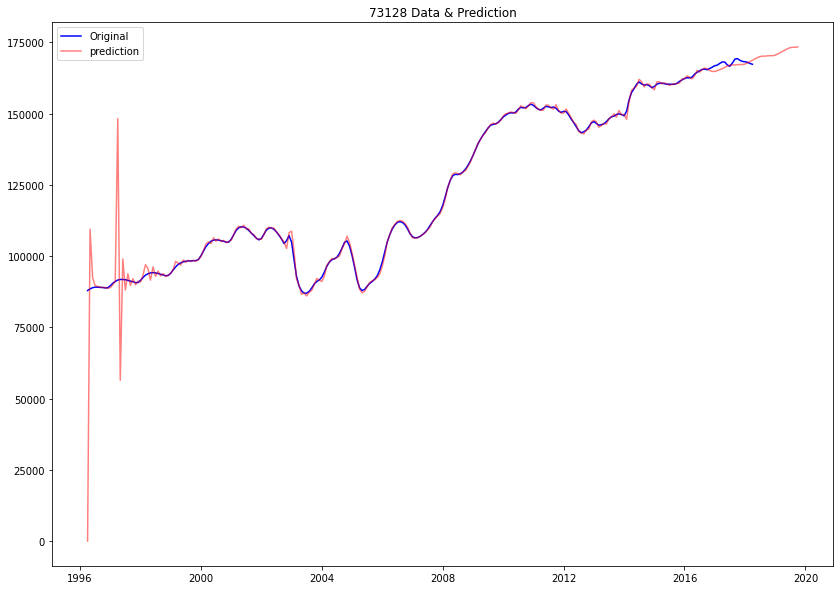

total return% =  2.481671530 %
CAGR =  1.647679095 %
 

47220
                                     SARIMAX Results                                      
Dep. Variable:                              47220   No. Observations:                  247
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1608.638
Date:                            Thu, 04 Mar 2021   AIC                           3225.275
Time:                                    13:27:01   BIC                           3238.850
Sample:                                04-01-1996   HQIC                          3230.757
                                     - 10-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8372      0.024     35.562      0.0

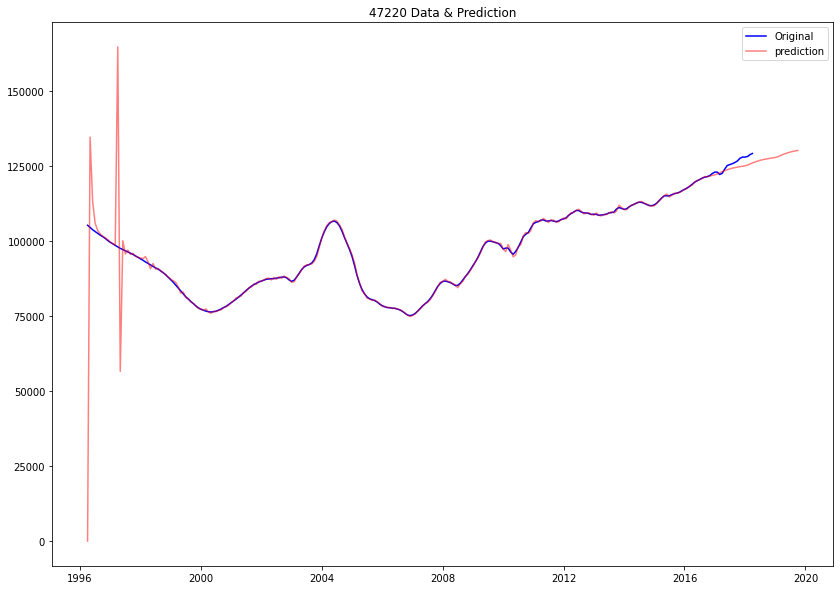

total return% =  3.041004162 %
CAGR =  2.017197340 %
 

47281
                                     SARIMAX Results                                      
Dep. Variable:                              47281   No. Observations:                  247
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1705.840
Date:                            Thu, 04 Mar 2021   AIC                           3419.680
Time:                                    13:27:34   BIC                           3433.254
Sample:                                04-01-1996   HQIC                          3425.161
                                     - 10-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7340      0.037     19.654      0.0

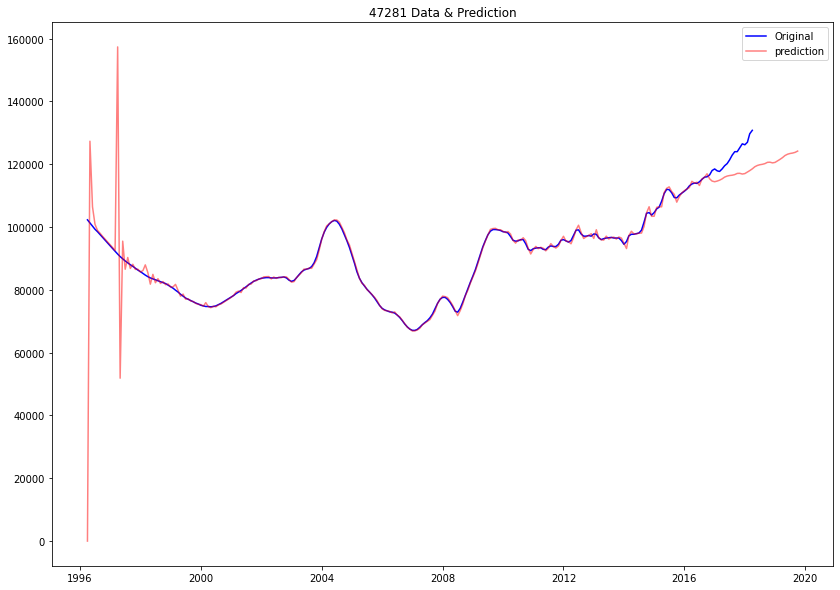

total return% =  4.191992211 %
CAGR =  2.775491266 %
 

73064
                                     SARIMAX Results                                      
Dep. Variable:                              73064   No. Observations:                  247
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1662.835
Date:                            Thu, 04 Mar 2021   AIC                           3333.671
Time:                                    13:28:05   BIC                           3347.245
Sample:                                04-01-1996   HQIC                          3339.153
                                     - 10-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8360      0.023     36.368      0.0

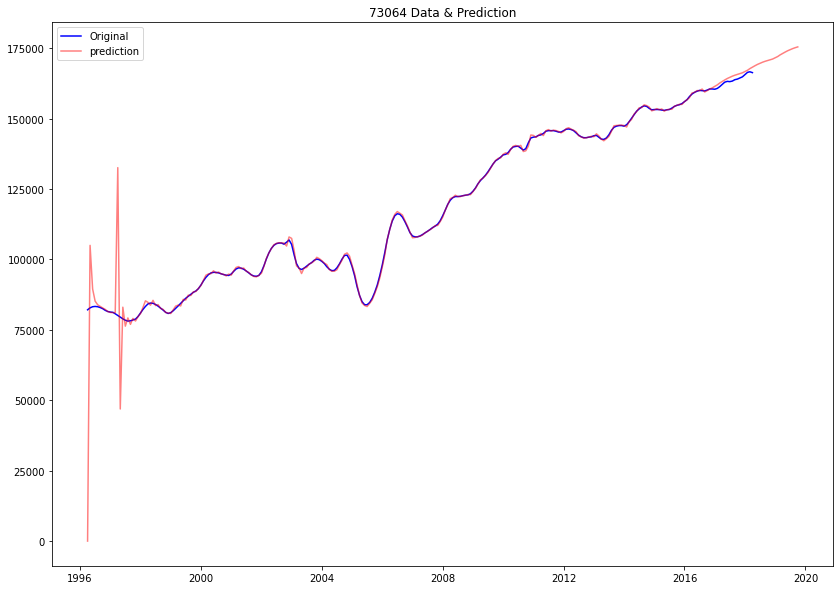

total return% =  3.967578398 %
CAGR =  2.627862983 %
 

10128
                                     SARIMAX Results                                      
Dep. Variable:                              10128   No. Observations:                  247
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2778.681
Date:                            Thu, 04 Mar 2021   AIC                           5567.363
Time:                                    13:28:32   BIC                           5584.331
Sample:                                04-01-1996   HQIC                          5574.215
                                     - 10-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6591      0.056     11.698      0.0

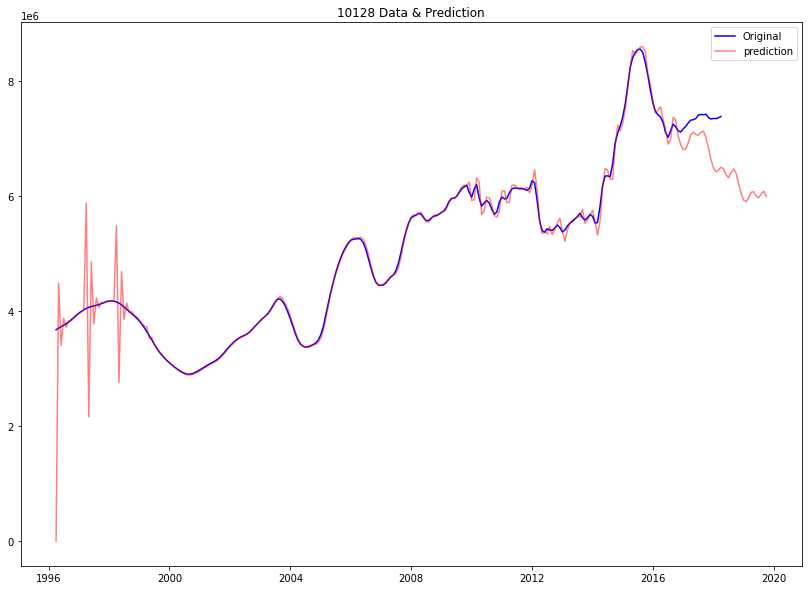

total return% =  -7.505679441 %
CAGR =  -5.068565317 %
 



In [62]:
#run model for each zip
for i in df4.columns:
    sarima_results(df4[i])

### Analysis

The best model for all of the zipcodes except 10128 was SARIMAX(1, 1, 1)x(0, 1, 1, 12).      
Best model for 10128 SARIMAX(1, 1, 1)x(1, 1, 1, 12).  

All of the zipcodes had positive expected returns exept 10128(upper east side manhattan)
The CAGRs ranged from 1.6% to 2.7% making them relativly low but a potential option for a lower risk investor.

They all underperformed the national average 18 month home increase of 5.39% with 47821 coming the closest at 4.19%

### Conclusion

With all researched zipcodes offering returns below the national average for simmialr investment more research must be done before investing.

### Future Work

Given the abbility of real estate invetors to use leverage (mortgages) it is possable that by using leverage, particularly with low interest rates, investments could be worth while so further research is needed into returns and potential risks of leveraged investments.

Additionally, since this zipcodes did well during the Great Recession, they could potentially be lower risk investment and therefore worth investing in with a lower return. It is worth looking into their performance during other economic down turns.

Finnally, doing this same analysis on other zipcodes could yield potential investment opputinities.
